# Building ML Model to Classify Digits and Recognize Faces


In this project I will build classifiers to classify a given document or picture. There are 2 parts. In the first part I will classify an image as one of the digits between 0 to 9. In the second part I will classify the image to figure out who the person - a simple face detection engine.

## Part 1
### Recognizing Handwritten Digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

### Inspecting the Data

Let's take a look at the data! Plot the first 5 examples in our dataset and their training labels.

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
0
(64,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


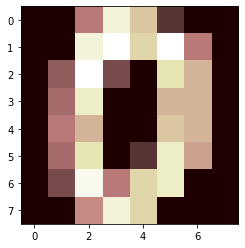

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
1
1
(64,)
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


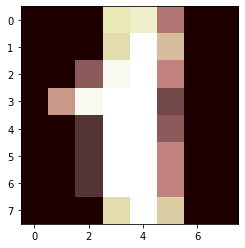

[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
2
2
(64,)
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


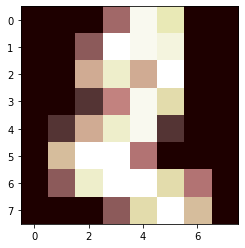

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
3
3
(64,)
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


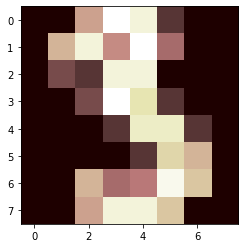

[ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
  1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
  0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1.  0.  0.  0.  0.  3. 15. 10.
  0.  0.  0.  0.  0.  2. 16.  4.  0.  0.]
4
4
(64,)
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


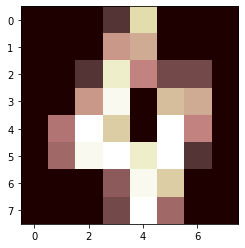

In [19]:
data = digits.data
targets = digits.target
target_name = digits.target_names
i=0
while (i<5):
  print(data[i])
  print(targets[i])
  print(target_name[i])
  print(data[i].shape)
  data_reshaped = np.reshape(data[i],(8,8))
  print(data_reshaped)
  plt.imshow(data_reshaped, cmap=plt.cm.pink)
  plt.show()
  i=i+1

### Create Train Test Split

Split data to create training and testing data.  

In [6]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data, targets,test_size=0.2)

X1_train[0].shape

(64,)

In [7]:
Y1_train[0]

3

### Build Model

Use the training data to train a model!

In [8]:
logisticReg = LogisticRegression(max_iter=10000)
logisticReg.fit(X1_train, Y1_train)

LogisticRegression(max_iter=10000)

### Evaluate

Report the accuracy of the model on test set 

In [9]:
logisticReg.score(X1_test, Y1_test)

0.9694444444444444

### Predict

Predict a label for a random image from unseen test data set

[ 0.  0.  2. 16. 10.  1.  0.  0.  0.  0.  7. 16. 16. 12.  0.  0.  0.  0.
  3. 16. 16. 15.  0.  0.  0.  0.  2. 16. 14.  0.  0.  0.  0.  0.  8. 15.
 16.  6.  0.  0.  0.  0. 13.  8.  9. 13.  0.  0.  0.  0. 12. 10.  7. 16.
  0.  0.  0.  0.  3. 13. 15. 10.  0.  0.]


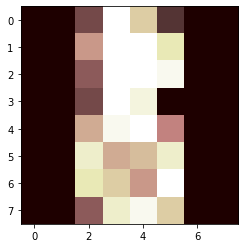

In [20]:
import random
import math

i = math.ceil(random.random()* X1_test.shape[0]) 
test_data=X1_test[i]
print(test_data)
test_data_reshaped = np.reshape(test_data, (8, 8))
plt.imshow(test_data_reshaped,cmap=plt.cm.pink)

In [21]:
test_data_reshaped_for_predict = np.reshape(test_data, (1,64))
pred_lable_val_test_data = logisticReg.predict(test_data_reshaped_for_predict)
print(pred_lable_val_test_data)

[8]


In [22]:
pred_name = digits.target_names[pred_lable_val_test_data]
print(pred_name)

[8]


## Part 2
### Labeled Faces

In this part I will build 3 different classifers and report accuracy on 3 different types of model. I will build a classifier to label famous faces! I will import the LFW data from sklearn and view the first 4 samples of the dataset with their labels.

### Understanding Data

In [24]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

### Inspecting the Data
Plot a few images

In [25]:
for name in lfw_people.target_names:
  print(name)
  

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
5
0
(1850,)
[[254.       254.       251.66667  ...  65.333336  50.666668  40.333332]
 [253.33333  251.33333  247.33333  ...  66.666664  52.        42.666668]
 [240.66667  231.66667  211.66667  ...  62.        49.        42.      ]
 ...
 [ 74.333336  54.        31.666666 ...  97.666664  93.        90.      ]
 [ 65.333336  47.        30.333334 ...  91.666664  92.        86.333336]
 [ 59.333332  44.333332  32.333332 ...  87.333336  88.666664  86.666664]]


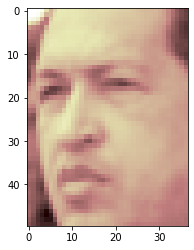

[ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
6
1
(1850,)
[[ 39.666668  50.333332  47.       ...  61.333332  51.        38.666668]
 [ 47.666668  63.        65.333336 ...  57.666668  55.        44.666668]
 [ 55.333332  76.666664  86.333336 ...  71.        48.333332  43.666668]
 ...
 [ 73.666664  75.666664  75.333336 ... 125.666664 119.666664 115.333336]
 [ 75.333336  76.333336  77.       ... 124.       116.       116.333336]
 [ 77.333336  76.333336  75.666664 ... 117.666664 115.       133.66667 ]]


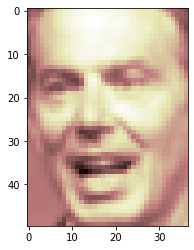

[ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
3
2
(1850,)
[[ 89.333336 104.       126.       ... 150.       150.33333  149.      ]
 [100.       128.       143.66667  ... 159.33333  151.33333  147.33333 ]
 [123.666664 142.66667  146.66667  ... 161.       152.66667  147.33333 ]
 ...
 [ 75.666664  73.666664  74.       ... 123.       168.66667  179.      ]
 [ 73.        68.666664  69.333336 ... 150.       182.       181.33333 ]
 [ 78.666664  66.        65.666664 ... 175.33333  183.33333  183.      ]]


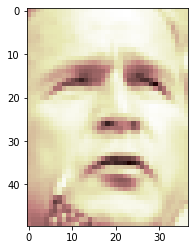

[16.666666   7.6666665  7.        ... 27.666666  38.        51.333332 ]
1
3
(1850,)
[[ 16.666666    7.6666665   7.        ...   7.          6.3333335
    5.6666665]
 [ 70.         36.666668   14.        ...   7.3333335   5.6666665
    5.3333335]
 [128.         99.333336   61.666668  ...   8.          5.3333335
    4.3333335]
 ...
 [111.666664  103.333336   86.333336  ...  37.333332   50.333332
   64.666664 ]
 [ 87.         79.666664   71.666664  ...  30.         42.333332
   55.666668 ]
 [ 70.333336   63.333332   59.        ...  27.666666   38.
   51.333332 ]]


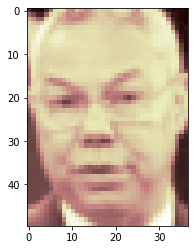

[122.666664 121.       126.666664 ...  22.        61.666668  70.666664]
0
4
(1850,)
[[122.666664 121.       126.666664 ...  69.        61.666668  58.      ]
 [121.666664 117.666664 125.333336 ...  72.666664  63.666668  58.      ]
 [121.       117.666664 125.       ...  78.333336  67.333336  59.333332]
 ...
 [ 18.666666  16.666666  21.333334 ...  10.        18.333334  30.      ]
 [ 20.333334  19.666666  14.333333 ...  17.333334  45.666668  53.666668]
 [ 20.333334  21.        19.666666 ...  22.        61.666668  70.666664]]


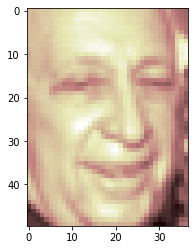

[ 65.333336  74.333336  80.       ...  64.        83.       110.333336]
1
5
(1850,)
[[ 65.333336  74.333336  80.       ... 199.       172.33333  137.66667 ]
 [ 71.333336  76.        80.333336 ... 198.66667  180.66667  142.      ]
 [ 74.        77.666664  83.333336 ... 191.       188.33333  153.66667 ]
 ...
 [ 61.333332 134.66667  169.66667  ...  76.666664  99.333336 112.333336]
 [ 26.666666  88.333336 161.       ...  68.       101.666664 115.      ]
 [ 16.666666  47.       137.66667  ...  64.        83.       110.333336]]


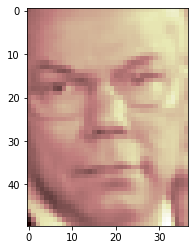

In [26]:
data =lfw_people.data
targets =lfw_people.target
target_names = lfw_people.target_names
i=0
while (i<6):
  print(data[i])
  print(targets[i])
  print(target_name[i])
  print(data[i].shape)
  data_reshaped = np.reshape(data[i],(50,37))
  print(data_reshaped)
  plt.imshow(data_reshaped, cmap=plt.cm.pink)
  plt.show()
  i=i+1

### Create Train and Test Split
Create the training and testing data set

In [27]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(data, targets, test_size=0.3)

X2_train[0].shape

(1850,)

In [28]:
Y2_train[0]

5

### Build the Model

I pick 3 different models to implement from: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning.

#### Model 1

In [29]:
logisticReg = LogisticRegression(max_iter=10000)
logisticReg.fit(X2_train, Y2_train)

LogisticRegression(max_iter=10000)

#### Model 2

In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNClass = KNeighborsClassifier()
KNClass.fit(X2_train, Y2_train)

KNeighborsClassifier()

#### Model 3

In [34]:
from sklearn.svm import SVC
svcClass = SVC()
svcClass.fit(X2_train, Y2_train)

SVC()

### Evaluate
Evaluate the model and report accuracy for all 3 models 

#### Model 1

In [35]:
logisticReg.score(X2_test, Y2_test)

0.8423772609819121

#### Model 2

In [36]:
KNN_model.score(X2_test, Y2_test)

0.5891472868217055

#### Model 3

In [37]:
svcClass.score(X2_test, Y2_test)

0.7545219638242894

### Predict

Test the model in any random image from test set. Display the image and the prediction using all 3 models

[164.33333  142.66667  126.666664 ...  33.        38.666668  43.      ]


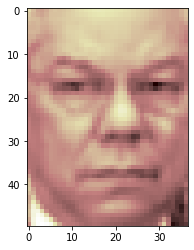

In [46]:
i = math.ceil(random.random()* X2_test.shape[0]) 

test_data=X2_test[i]
print(test_data)
test_data_reshaped = np.reshape(test_data, (50, 37))
plt.imshow(test_data_reshaped,cmap=plt.cm.pink)

#### Model 1

In [47]:
test_data_reshaped_for_predict = np.reshape(test_data, (1,1850))
pred_lable_val_test_data = logisticReg.predict(test_data_reshaped_for_predict)
print(pred_lable_val_test_data)

[1]


In [48]:
pred_name = lfw_people.target_names[pred_lable_val_test_data]
print(pred_name)

['Colin Powell']


#### Model 2

In [49]:
test_data_reshaped_for_predict = np.reshape(test_data, (1,1850))
pred_lable_val_test_data = KNClass.predict(test_data_reshaped_for_predict)
print(pred_lable_val_test_data)

[1]


In [50]:
pred_name = lfw_people.target_names[pred_lable_val_test_data]
print(pred_name)

['Colin Powell']


#### Model 3

In [51]:
test_data_reshaped_for_predict = np.reshape(test_data, (1,1850))
pred_lable_val_test_data = svcClass.predict(test_data_reshaped_for_predict)
print(pred_lable_val_test_data)

[1]


In [52]:
pred_name = lfw_people.target_names[pred_lable_val_test_data]
print(pred_name)

['Colin Powell']
